In [77]:
import wandb
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import umap
import wandb

In [78]:
wandb.login()
wandb.init(project="ium-projekt", entity="ium-team", group="k-means")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: filipeckijan (ium-team). Use `wandb login --relogin` to force relogin


In [56]:
data = df = pd.read_json(
    "../../data_v3/data/preprocessed_tracks.jsonl", lines=True)

In [57]:
numerical_columns = ['popularity', 'duration_ms', 'explicit',
                     'danceability', 'energy', 'key', 'loudness',
                     'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                     'valence', 'tempo', 'popularity_from_sessions', 'release_date_numeric']


In [58]:
data_numerical = data[numerical_columns].copy()

In [59]:
k = 10
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_numerical)

/home/filipeckijan/.local/share/virtualenvs/ium-projekt-ziE9g0x4/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10)

In [60]:
data_numerical['kmeans_labels'] = kmeans.labels_

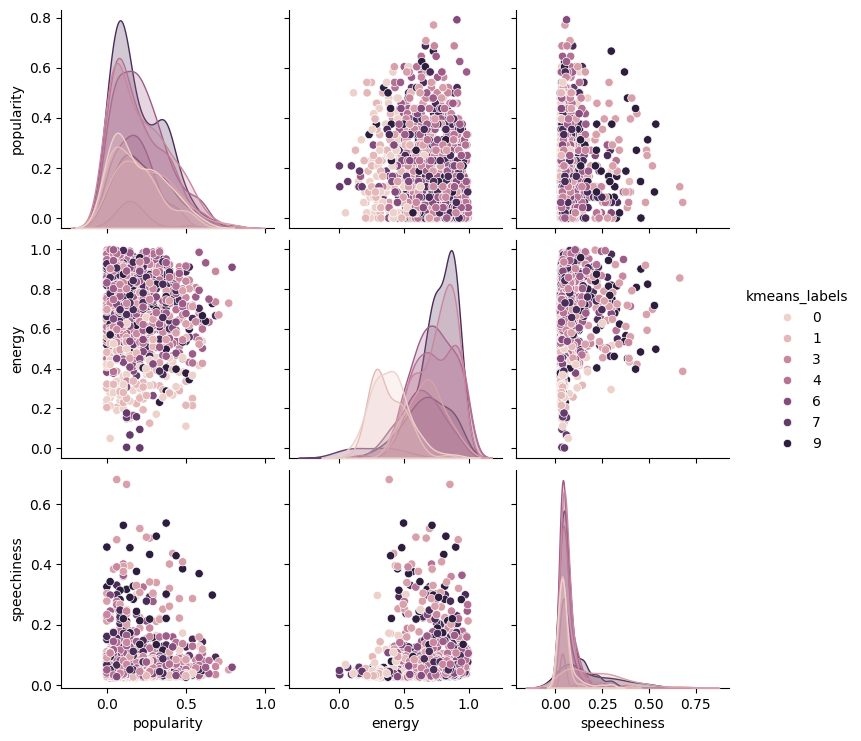

In [61]:
sns.pairplot(data_numerical[["popularity", "energy", "speechiness", "kmeans_labels"]].sample(1000), hue="kmeans_labels")

In [62]:
reducer = umap.UMAP()

In [63]:
sampled_df = data_numerical.sample(1000)

In [64]:
embedding = reducer.fit_transform(sampled_df.drop(columns=['kmeans_labels']))

In [65]:
embedding.shape

(1000, 2)

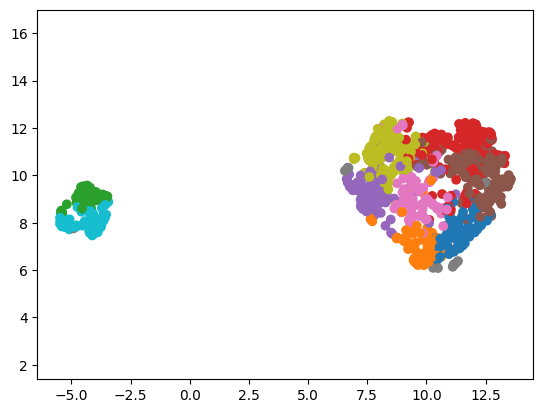

In [66]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in sampled_df['kmeans_labels']])
plt.gca().set_aspect('equal', 'datalim')

In [67]:
data_numerical.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity_from_sessions,release_date_numeric,kmeans_labels
count,22412.000000,22412.000000,22412.000000,22412.000000,22412.000000,22412.000000,22412.000000,22412.000000,22412.000000,22412.000000,22412.000000,22412.000000,22412.000000,22412.000000,22412.000000,22412.000000
mean,0.216158,0.048786,0.166607,0.611323,0.648630,0.479893,0.826018,0.087833,0.268832,0.040301,0.183900,0.522705,0.553896,0.378079,0.840891,4.377878
std,0.167672,0.017629,0.372633,0.161488,0.209809,0.323528,0.082973,0.094616,0.277220,0.153134,0.170501,0.246697,0.134554,0.122217,0.151250,2.693883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.083333,0.039336,0.000000,0.505102,0.508458,0.181818,0.794537,0.035911,0.029918,0.000000,0.083655,0.327952,0.445200,0.292683,0.773485,2.000000
50%,0.187500,0.046470,0.000000,0.620408,0.672639,0.454545,0.843847,0.049047,0.165661,0.000003,0.114721,0.516650,0.545395,0.378049,0.889592,4.000000
75%,0.333333,0.055168,0.000000,0.729592,0.816798,0.727273,0.878096,0.091102,0.456827,0.000524,0.231472,0.719475,0.636432,0.451220,0.957599,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [68]:
embedding = reducer.fit_transform(sampled_df.drop(columns=['kmeans_labels', "explicit"]))

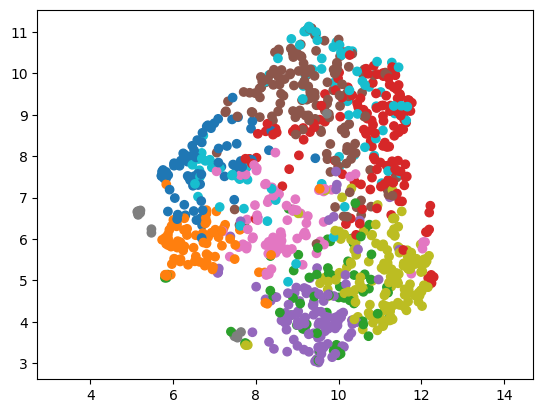

In [69]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in sampled_df['kmeans_labels']])
plt.gca().set_aspect('equal', 'datalim')

In [70]:
data_without_explicit = data_numerical.drop(columns=["explicit", "kmeans_labels"])

In [71]:
k = 10
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_without_explicit)

/home/filipeckijan/.local/share/virtualenvs/ium-projekt-ziE9g0x4/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10)

In [73]:
data_without_explicit["kmeans_labels"] = kmeans.labels_

In [74]:
sampled_df = data_without_explicit.sample(1000)

In [75]:
embedding = reducer.fit_transform(sampled_df.drop(columns=['kmeans_labels']))

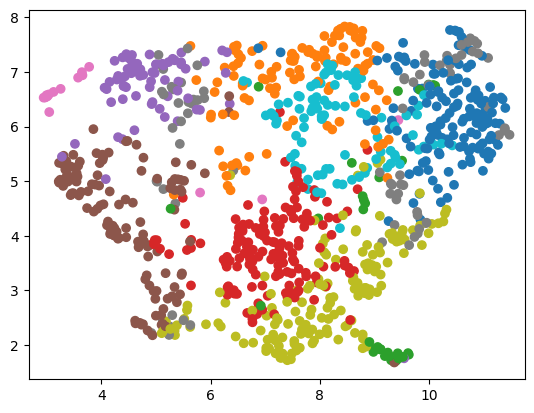

In [76]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in sampled_df['kmeans_labels']])
plt.gca().set_aspect('equal', 'datalim')